In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Nextcloud\Sites_Internet\quarto_PNSI\algo1':
  os.chdir(r'D:\Nextcloud\Sites_Internet\quarto_PNSI\algo1')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1675785262.0, "C:\\Users\\Fabrice\\AppData\\Local\\Prog

C:\Users\Fabrice\AppData\Local\Temp\ipykernel_9540\851344183.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
def recherche_naive(tableau, valeur):
    for i in range(len(tableau)):
        if tableau[i] == valeur:
            return i
    return -1

In [3]:
recherche_naive([1, 2, 3, 4, 5], 3)

2

In [4]:
recherche_naive([1, 2, 3, 4, 5], 6)

-1

In [5]:
def recherche_dichotomique(tableau, valeur):
    gauche = 0
    droite = len(tableau) - 1
    while gauche <= droite:
        milieu = (gauche + droite) // 2
        if tableau[milieu] == valeur:
            return milieu
        elif tableau[milieu] < valeur:
            gauche = milieu + 1
        else:
            droite = milieu - 1
    return -1

In [6]:
recherche_dichotomique([1, 2, 3, 4, 5], 2)

1

In [7]:
recherche_dichotomique([1, 2, 3, 4, 5], 6)

-1

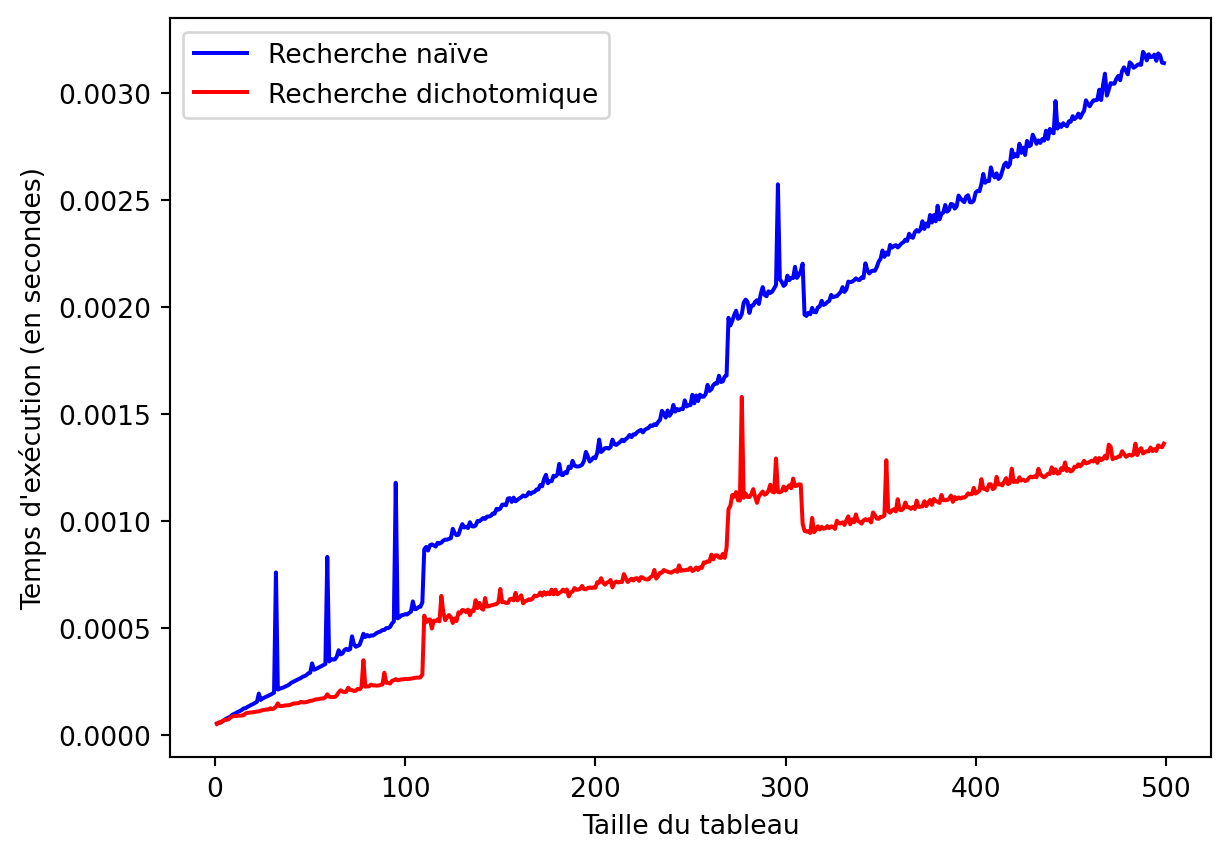

In [8]:
import timeit
import matplotlib.pyplot as plt

tailles = [i for i in range(1, 500)]
temps_naive = []
temps_dicho = []
# on applique la recherche dans le pire des cas : valeur absente su tableau
valeur = 1000
for n in tailles:
    temps_naive.append(timeit.timeit(
        "recherche_naive([k for k in range(n)], valeur)",
        globals=globals(),
        number=100
    ))
    temps_dicho.append(timeit.timeit(
        "recherche_dichotomique([k for k in range(n)], valeur)",
        globals=globals(),
        number=100
    ))
plt.plot(tailles,temps_naive, 'b', label="Recherche naïve")
plt.plot(tailles,temps_dicho, 'r', label="Recherche dichotomique")
plt.xlabel("Taille du tableau")
plt.ylabel("Temps d'exécution (en secondes)")
plt.legend()
plt.show()